## Today Content
- Preprocessing Contin...
- Introduction to Matplotlib
    - Image Reading and Slicing

### 3. Robust Scaler
- If data set contains large amount of outliers, then Robust Scaler is best technique.
- Scaling between Inter Quartile Range(25% to 75%)
- **Formula**
    - [Xi - median(X)] / [Q3(X) - Q1(X)]
        - Q1 - 25%(Lower Quartile)
        - Q2 - 50%(Median)
        - Q3 - 75%(Upper Qurtaile)

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/nagamounika5/Datasets/master/Advertisement.csv')

In [3]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [6]:
df.tail()

,TV,radio,newspaper,sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [9]:
df.quantile(0.25)

TV           74.375
radio         9.975
newspaper    12.750
sales        10.375
Name: 0.25, dtype: float64

In [10]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [11]:
(38.2 - 149.750000) / (218.825000 - 74.375000)

-0.7722395292488751

### Apply Robust Scaler Model

In [12]:
from sklearn.preprocessing import RobustScaler

In [13]:
rb1 = RobustScaler()

In [14]:
rb2 = rb1.fit_transform(df)

In [15]:
rb2

array([[ 5.56247837e-01,  5.61205273e-01,  1.34312210e+00,
         1.30960854e+00],
       [-7.28625822e-01,  6.17702448e-01,  5.98145286e-01,
        -3.55871886e-01],
       [-9.17618553e-01,  8.66290019e-01,  1.34621329e+00,
        -5.12455516e-01],
       [ 1.21149187e-02,  6.93032015e-01,  1.01236476e+00,
         7.97153025e-01],
       [ 2.14953271e-01, -4.55743879e-01,  1.00927357e+00,
         0.00000000e+00],
       [-9.76462444e-01,  9.79284369e-01,  1.52241113e+00,
        -8.11387900e-01],
       [-6.38629283e-01,  3.72881356e-01, -6.95517774e-02,
        -1.56583630e-01],
       [-2.04569055e-01, -1.24293785e-01, -4.37403400e-01,
         4.27046263e-02],
       [-9.77154725e-01, -7.83427495e-01, -7.65069552e-01,
        -1.15302491e+00],
       [ 3.46486674e-01, -7.64595104e-01, -1.40649150e-01,
        -3.27402135e-01],
       [-5.79093112e-01, -6.44067797e-01, -4.79134467e-02,
        -6.12099644e-01],
       [ 4.49636552e-01,  4.14312618e-02, -6.72333849e-01,
      

In [16]:
rb2 = pd.DataFrame(rb2, columns = df.columns)

In [17]:
rb2.tail()

,TV,radio,newspaper,sales
195,-0.772240,-0.723164,-0.369397,-0.754448
196,-0.384562,-0.677966,-0.545595,-0.455516
197,0.188647,-0.512241,-0.598145,-0.014235
198,0.926618,0.719397,1.250386,1.793594
199,0.570093,-0.538606,-0.527048,0.071174


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

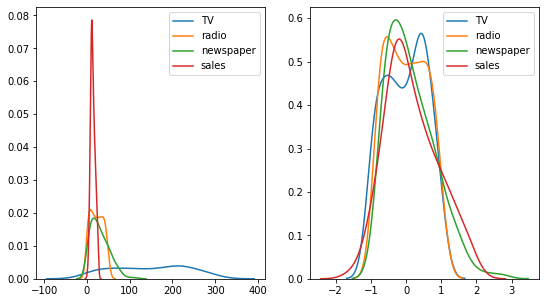

In [21]:
fig, (ax1,ax2) = plt.subplots(ncols = 2, figsize = (9,5))

sns.kdeplot(df['TV'], ax = ax1)
sns.kdeplot(df['radio'], ax = ax1)
sns.kdeplot(df['newspaper'], ax = ax1)
sns.kdeplot(df['sales'], ax = ax1)

sns.kdeplot(rb2['TV'],ax = ax2)
sns.kdeplot(rb2['radio'],ax = ax2)
sns.kdeplot(rb2['newspaper'],ax = ax2)
sns.kdeplot(rb2['sales'],ax = ax2)